---
title: "Unsupervised Learning"
format:
    html: 
        code-fold: false
---

<!-- After digesting the instructions, you can delete this cell, these are assignment instructions and do not need to be included in your final submission.  -->

{{< include instructions.qmd >}} 

# Code 

In [56]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('../../data/processed-data/Normalized_Data_with_Sentiments.csv')

# Specify the feature columns
features = [
    'Days Since Published', 'View Count', 'Like Count', 'Comment Count',
    'Subscriber Count', 'Definition', 'Mean Sentiment Score',
    'Duration_seconds', 'genre_label', 'singer_followers', 'singer_popularity'
]

# Ensure the target column 'popularity' exists in DataFrame
if 'Popularity' not in df.columns:
    raise ValueError("The 'popularity' column is missing from the DataFrame.")

# Split into input (X) and target (y)
X = df[features]  # Inputs
y = df['Popularity']  # Target

# Applying PCA
pca = PCA(n_components=3)  # Reduce to 4 dimensions for visualization
X_pca = pca.fit_transform(X)
# How much variance was retained?
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

Explained Variance Ratio: [0.35411601 0.1606999  0.12194563]
Total Variance Explained: 0.6367615347014879


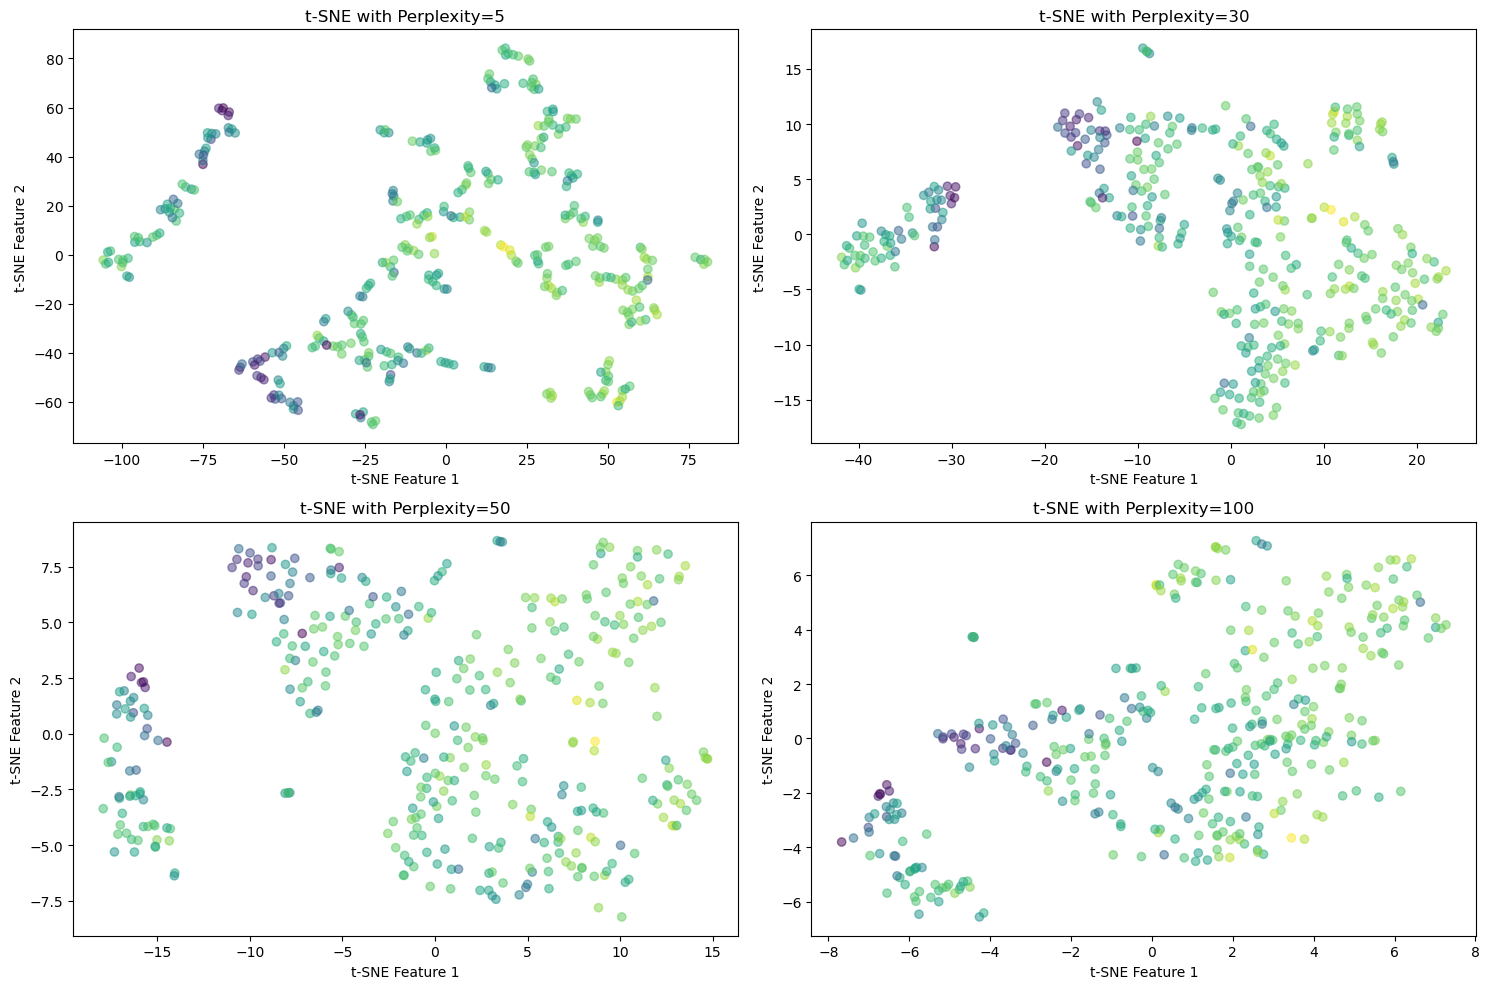

In [57]:
# Experimenting with different perplexity values
perplexities = [5, 30, 50, 100]
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for i, perplexity in enumerate(perplexities):
    # Applying t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=3000, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Plotting
    ax[i//2, i%2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', marker='o', alpha=0.5)
    ax[i//2, i%2].set_title(f't-SNE with Perplexity={perplexity}')
    ax[i//2, i%2].set_xlabel('t-SNE Feature 1')
    ax[i//2, i%2].set_ylabel('t-SNE Feature 2')

plt.tight_layout()
plt.show()

Explained Variance Ratio: [0.35411601 0.1606999 ]
Total Variance Explained by 2 PCs: 0.5148159010329216


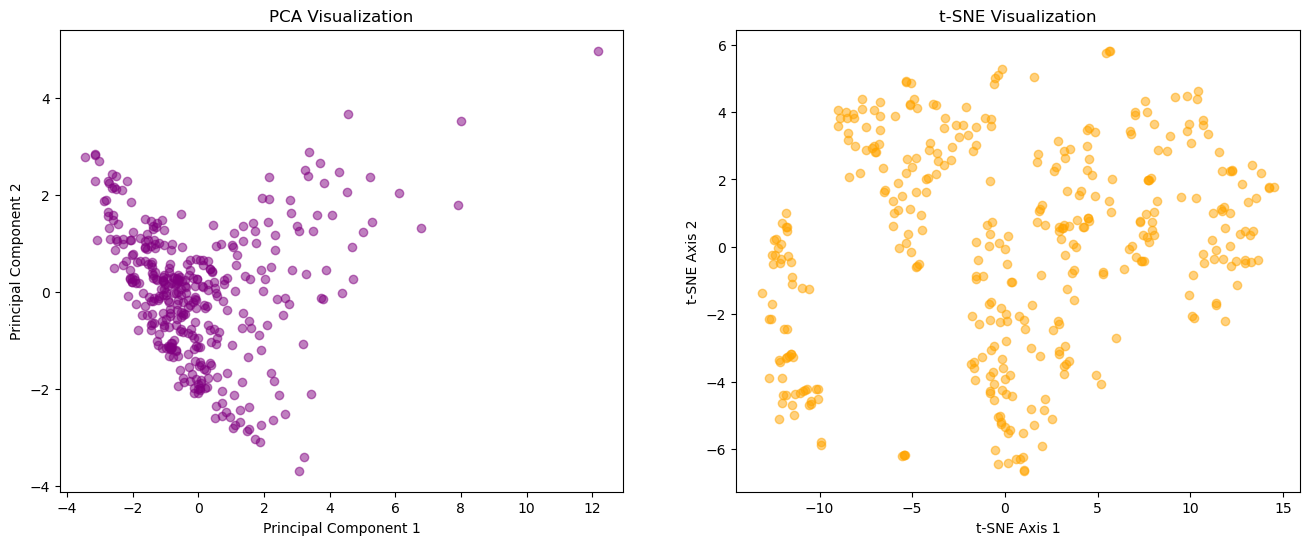

In [58]:
# PCA Analysis
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Explained Variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained by 2 PCs:", sum(pca.explained_variance_ratio_))

# t-SNE Analysis
tsne = TSNE(n_components=2, perplexity=50, n_iter=300)
X_tsne = tsne.fit_transform(X)

# Compare PCA and t-SNE visually
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c='purple', alpha=0.5)
ax[0].set_title('PCA Visualization')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c='orange', alpha=0.5)
ax[1].set_title('t-SNE Visualization')
ax[1].set_xlabel('t-SNE Axis 1')
ax[1].set_ylabel('t-SNE Axis 2')

plt.show()

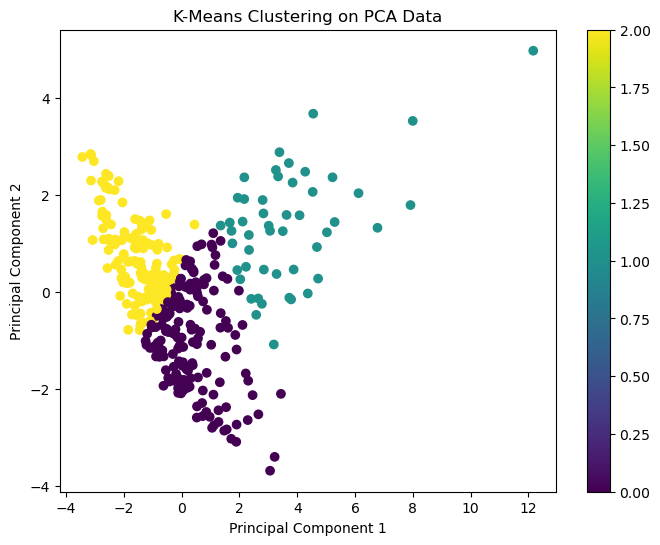

In [59]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Applying K-Means to PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(X_pca)

# Visualizing the PCA clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca.labels_, cmap='viridis')
plt.title('K-Means Clustering on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

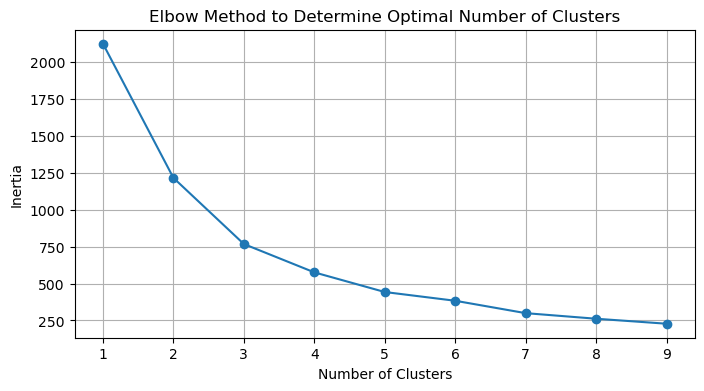

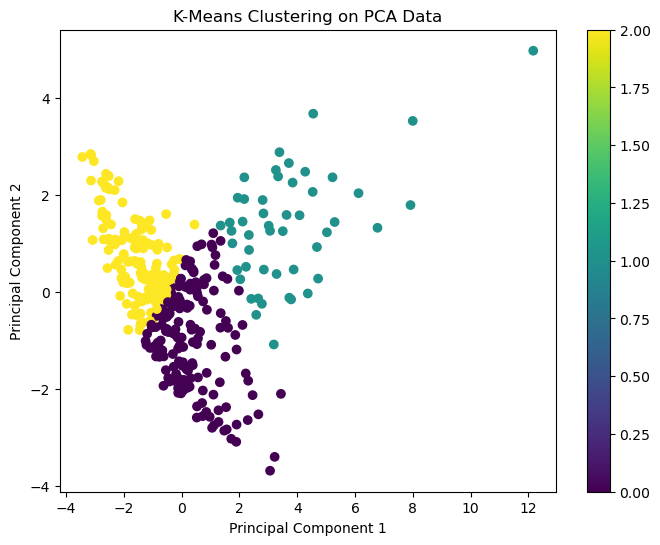

In [60]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Data for applying the Elbow method
inertias = []
cluster_range = range(1, 10)  # Test 1 to 9 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertias, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# Applying K-Means to PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(X_pca)

# Visualizing the PCA clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca.labels_, cmap='viridis')
plt.title('K-Means Clustering on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

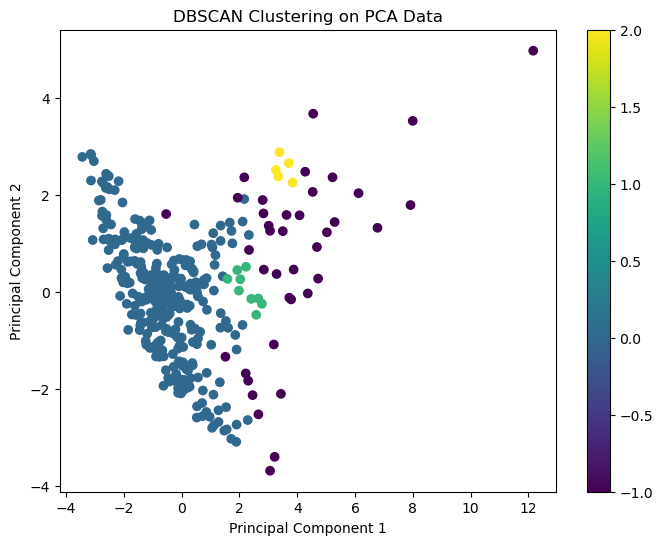

In [61]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN to PCA data
dbscan_pca = DBSCAN(eps=0.5, min_samples=5)
clusters_pca = dbscan_pca.fit_predict(X_pca)

# Visualizing the PCA clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='viridis')
plt.title('DBSCAN Clustering on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

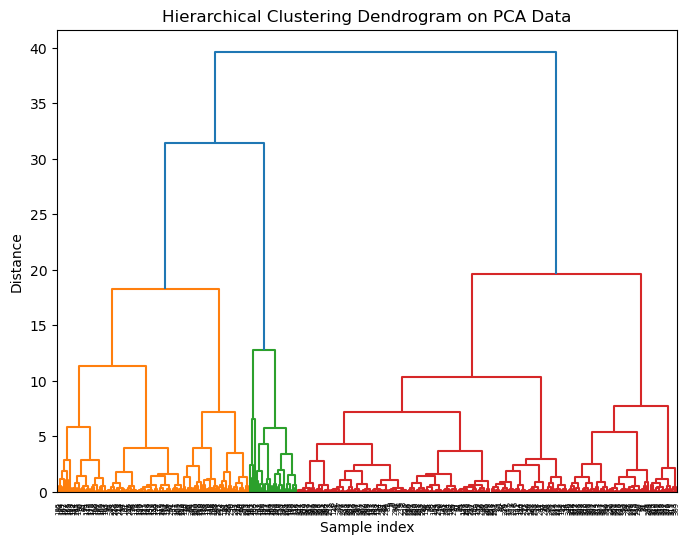

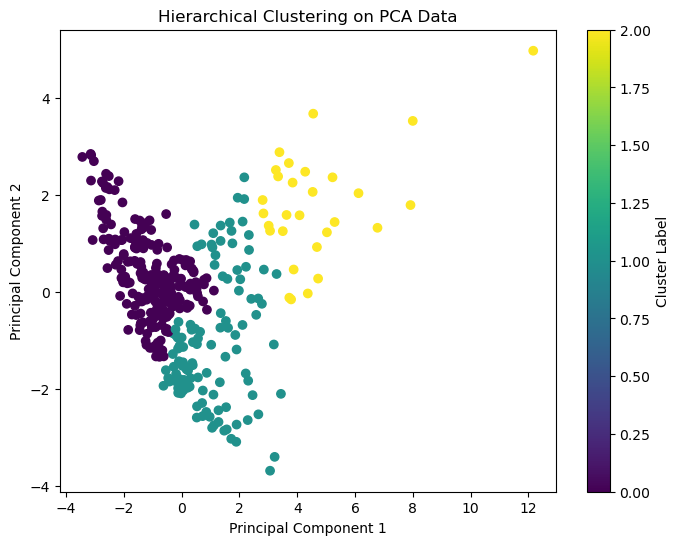

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Applying Hierarchical Clustering to PCA data
linked_pca = linkage(X_pca, method='ward')

# Plotting the dendrogram for PCA data
plt.figure(figsize=(8, 6))
dendrogram(linked_pca, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram on PCA Data')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

from sklearn.cluster import AgglomerativeClustering

# Applying Hierarchical Clustering with 3 clusters
hc_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_pca = hc_model.fit_predict(X_pca)

# Plotting the scatter plot for the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='viridis')
plt.title('Hierarchical Clustering on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()



In [63]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(X_pca, kmeans_pca.labels_)
# Print the Silhouette Score for K-Means
print("Silhouette Score for K-Means:", silhouette_kmeans)

silhouette_dbscan = silhouette_score(X_pca, clusters_pca)
print("Silhouette Score for DBSCAN:", silhouette_dbscan)

# Calculate Silhouette Score for Hierarchical Clustering
silhouette_hierarchical = silhouette_score(X_pca, clusters_pca)
# Print the Silhouette Score for Hierarchical Clustering
print("Silhouette Score for Hierarchical Clustering:", silhouette_hierarchical)

Silhouette Score for K-Means: 0.38368484495923294
Silhouette Score for DBSCAN: 0.39254202943407834
Silhouette Score for Hierarchical Clustering: 0.39254202943407834


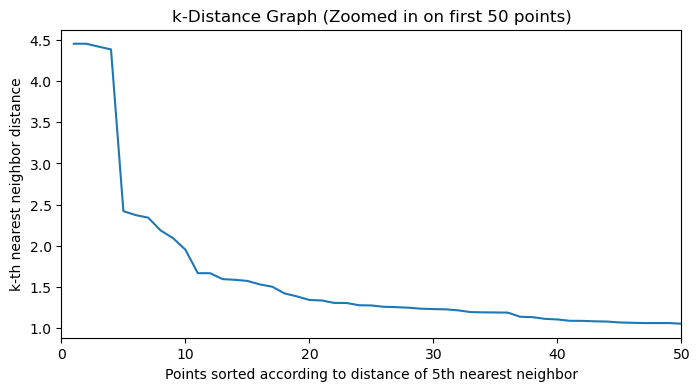

In [69]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# k-distance
k = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(X_tsne)
distances, indices = nbrs.kneighbors(X_tsne)

# make k-distance plot
distance_dec = sorted(distances[:, k-1], reverse=True)

# Re-attempting to plot the k-distance graph zoomed into the first 50 points
plt.figure(figsize=(8, 4))
plt.plot(list(range(1, 51)), distance_dec[:50])
plt.xlabel('Points sorted according to distance of ' + str(k) + 'th nearest neighbor')
plt.ylabel('k-th nearest neighbor distance')
plt.title('k-Distance Graph (Zoomed in on first 50 points)')
plt.xlim(0, 50)
plt.show()

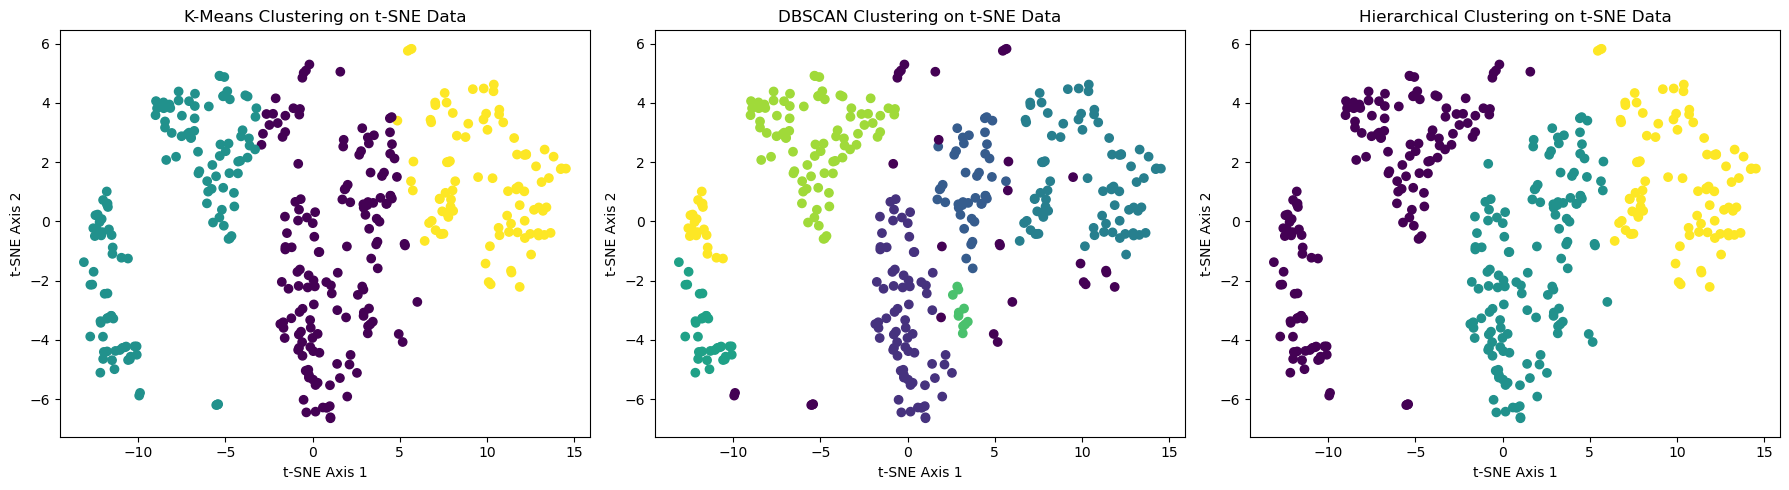

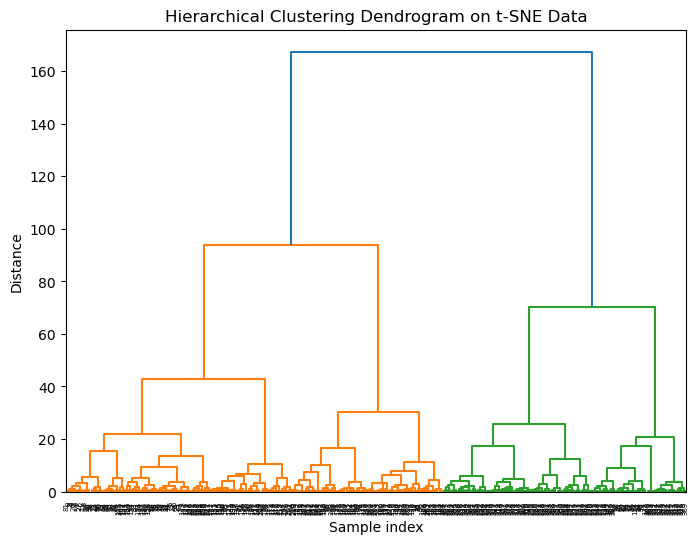

Silhouette Score for K-Means: 0.463882
Silhouette Score for DBSCAN: 0.3538208
Silhouette Score for Hierarchical Clustering on t-SNE data: 0.456777


In [79]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_tsne = kmeans.fit(X_tsne)
kmeans_tsne_labels = kmeans_tsne.labels_

# DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan_tsne = dbscan.fit(X_tsne)
dbscan_tsne_labels = dbscan_tsne.labels_

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_tsne = hierarchical.fit(X_tsne)
hierarchical_tsne_labels = hierarchical_tsne.labels_

# Plotting the results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# K-Means Plot
axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_tsne_labels, cmap='viridis', marker='o')
axes[0].set_title('K-Means Clustering on t-SNE Data')
axes[0].set_xlabel('t-SNE Axis 1')
axes[0].set_ylabel('t-SNE Axis 2')

# DBSCAN Plot
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_tsne_labels, cmap='viridis', marker='o')
axes[1].set_title('DBSCAN Clustering on t-SNE Data')
axes[1].set_xlabel('t-SNE Axis 1')
axes[1].set_ylabel('t-SNE Axis 2')

# Hierarchical Plot
axes[2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=hierarchical_tsne_labels, cmap='viridis', marker='o')
axes[2].set_title('Hierarchical Clustering on t-SNE Data')
axes[2].set_xlabel('t-SNE Axis 1')
axes[2].set_ylabel('t-SNE Axis 2')

plt.tight_layout()
plt.show()

# Applying Hierarchical Clustering to t-SNE data
linked_tsne = linkage(X_tsne, method='ward')

# Plotting the dendrogram for t-SNE data
plt.figure(figsize=(8, 6))
dendrogram(linked_tsne, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram on t-SNE Data')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(X_tsne, kmeans_tsne.labels_)
# Print the Silhouette Score for K-Means
print("Silhouette Score for K-Means:", silhouette_kmeans)

silhouette_dbscan = silhouette_score(X_tsne, dbscan_tsne_labels)
print("Silhouette Score for DBSCAN:", silhouette_dbscan)

# Calculate Silhouette Score for Hierarchical Clustering on t-SNE data
silhouette_hierarchical = silhouette_score(X_tsne, hierarchical_tsne_labels)
# Print the Silhouette Score for Hierarchical Clustering on t-SNE data
print("Silhouette Score for Hierarchical Clustering on t-SNE data:", silhouette_hierarchical)